In [23]:
import pandas as pd

superstore = pd.read_excel('US_Superstore_data.xls')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [24]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [25]:
superstore['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

i dont need postal code, row id, customer and product id, and region columns, as well as Country (bcs its only 1 country -USA) so i need only state and city columns for identification clients and sales

In [28]:
superstore_clean = superstore.drop(['Postal Code','Row ID','Region','Customer ID','Product ID','Country'], axis=1)


In [29]:
superstore_clean.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


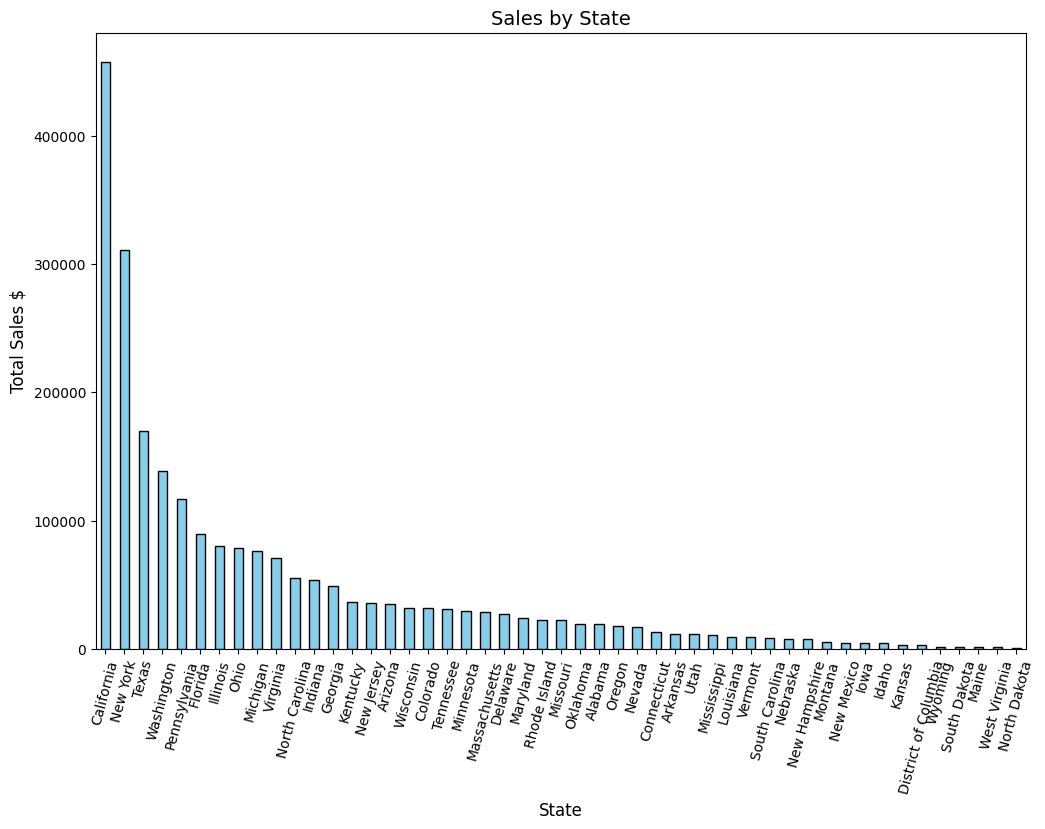

In [39]:
import matplotlib.pyplot as plt
# grouping states by sales amount
sales_state = superstore_clean.groupby('State')['Sales'].sum().sort_values(ascending=False)
#creating simple bar to observe best and worst states by sales
plt.figure(figsize=(12,8))
sales_state.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.show()

we can highlight California, New York, Texas and Washington as the states that form the largest portion of all company sales. as well as 5 states at the end of the list in which there are practically no sales, and you either need to focus your attention on promoting these states and strengthening their marketing, or withdraw the company from these states in order to avoid losses

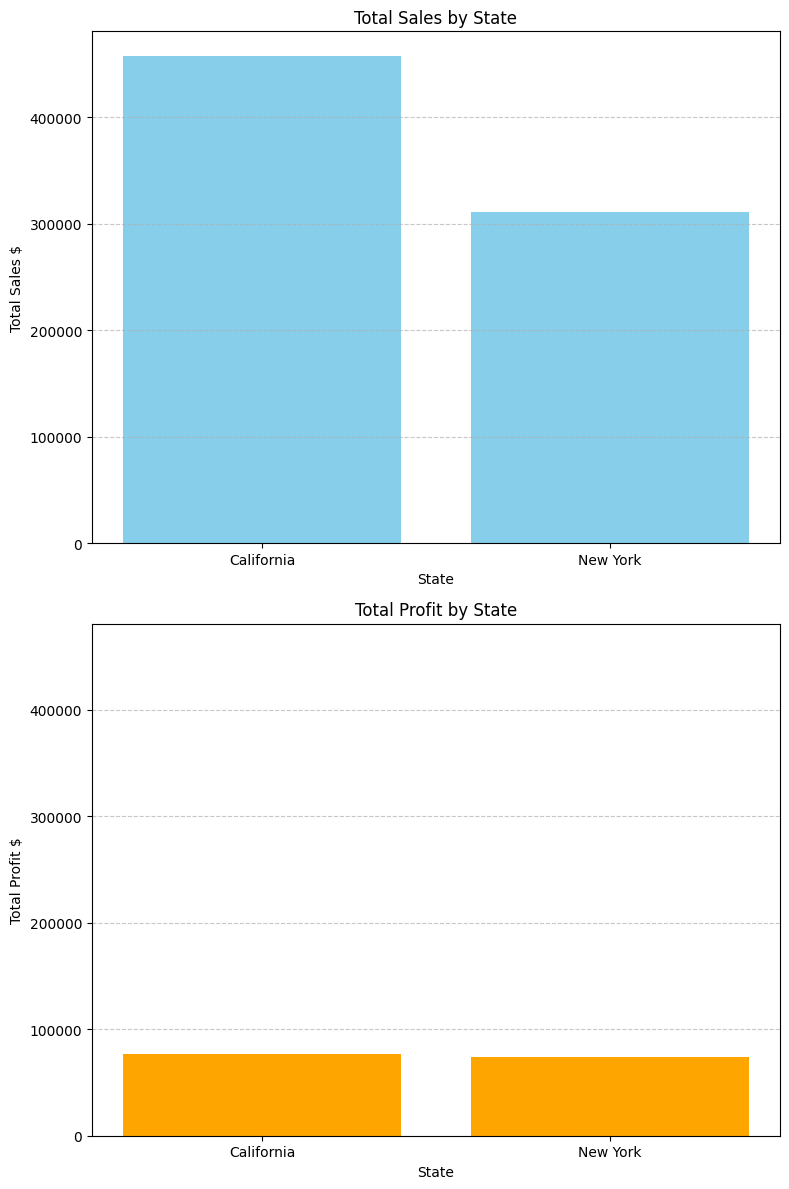

In [75]:
import matplotlib.pyplot as plt
# calculating total amount of sales and profits by state
total_sales_CA = superstore_clean[superstore_clean['State'] == 'California']['Sales'].sum()
total_sales_NY = superstore_clean[superstore_clean['State'] == 'New York']['Sales'].sum()
profit_CA = superstore_clean[superstore_clean['State'] == 'California']['Profit'].sum()
profit_NY = superstore_clean[superstore_clean['State'] == 'New York']['Profit'].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 12))

# subplot 1 for sales
ax1.bar(['California', 'New York'], [total_sales_CA, total_sales_NY], color = 'skyblue')
ax1.set_xlabel('State')
ax1.set_ylabel('Total Sales $')
ax1.set_title('Total Sales by State')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# subplot 2 for profit
ax2.bar(['California', 'New York'], [profit_CA, profit_NY], color = 'orange')
ax2.set_xlabel('State')
ax2.set_ylabel('Total Profit $')
ax2.set_title('Total Profit by State')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Despite California's higher sales figure, NY and California's profits are at the same level, which suggests that in New York there are more sales of goods in categories where prices are higher, buyers are more affluent and the sales department is more efficient. It is also likely that fewer customers receive fewer discounts on products, but this does not greatly affect the overall number of sales.

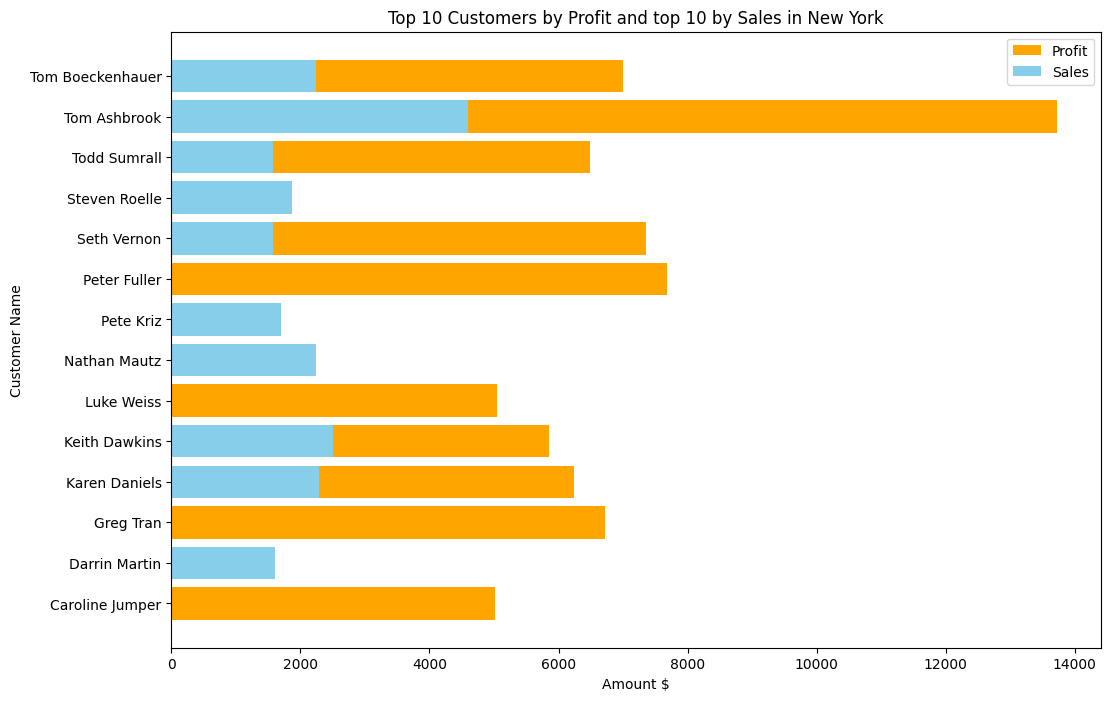

In [108]:
import matplotlib.pyplot as plt
# creating top 10 in New York customers by sales and top 10 by profit
new_york_customers = superstore_clean[superstore_clean['State'] == 'New York']
best_profit_NY = new_york_customers.groupby('Customer Name')['Profit'].sum()
best_sales_NY = new_york_customers.groupby('Customer Name')['Sales'].sum()

top_10_profit_NY = best_profit_NY.sort_values(ascending=False).head(10)
top_10_sales_NY = best_sales_NY.sort_values(ascending=False).head(10)
# comparing 2 values
top5_combined = pd.DataFrame({'Profit':top_10_profit_NY, 'Sales':top_10_sales_NY})
plt.figure(figsize=(12, 8))
bar_width = 0.35
customers = top5_combined.index

plt.barh(customers, top5_combined['Sales'], color='orange', label='Profit')
plt.barh(customers, top5_combined['Profit'], color='skyblue', label='Sales')

plt.xlabel('Amount $')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Profit and top 10 by Sales in New York')
plt.legend()
plt.show()

we can observe that there are several customers who make purchases most frequently and generate the greatest profit for the company. Also, there are clients whose sales numbers are high, but they do not generate a high profit, which you can point to discounts, or to a private client (not a corporate client)

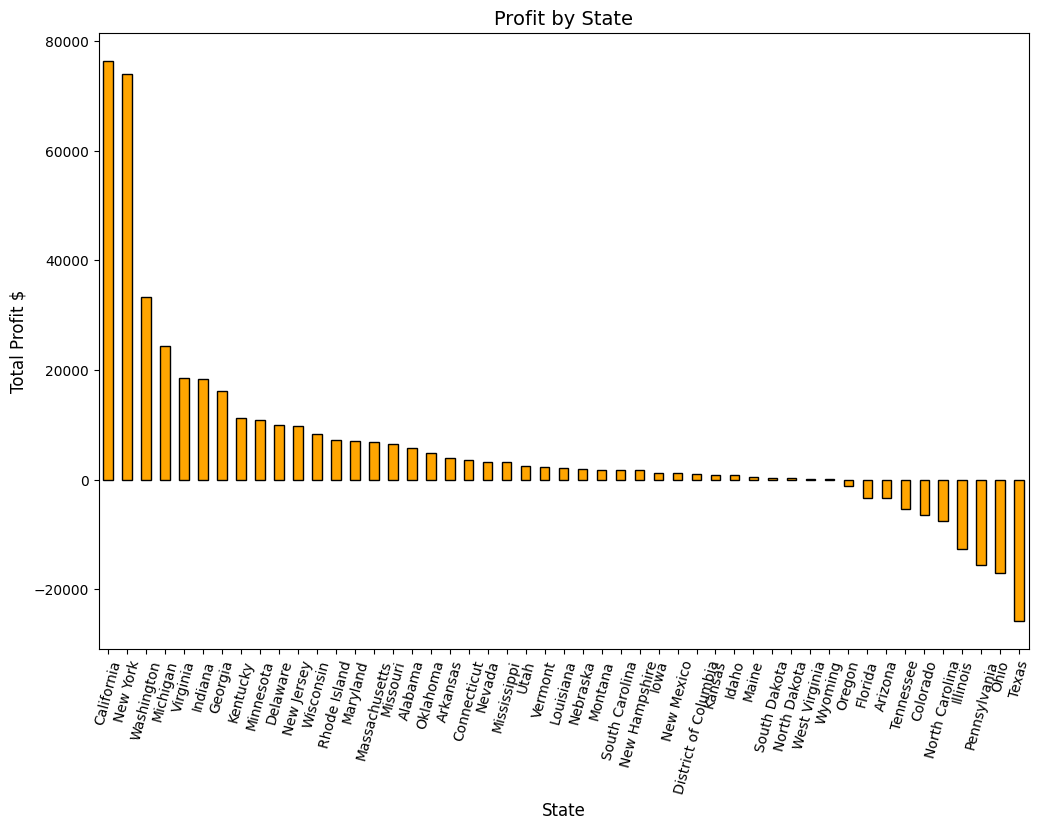

In [59]:
import matplotlib.pyplot as plt

profitability_states = superstore_clean.groupby('State')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
profitability_states.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Profit by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Profit $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.show()

We're seeing more states generating shortages, with Texas, Pennsylvania and Florida ranking high in sales. Despite sales, these states are unprofitable, which indicates a large number of corporate clients, high discounts and poor performance of the sales department (selling only cheap company products). To solve the problem, we need to analyze the work of the deficit states and focus marketing attention on these states

In [61]:
superstore_clean['Customer Name'].nunique()

793

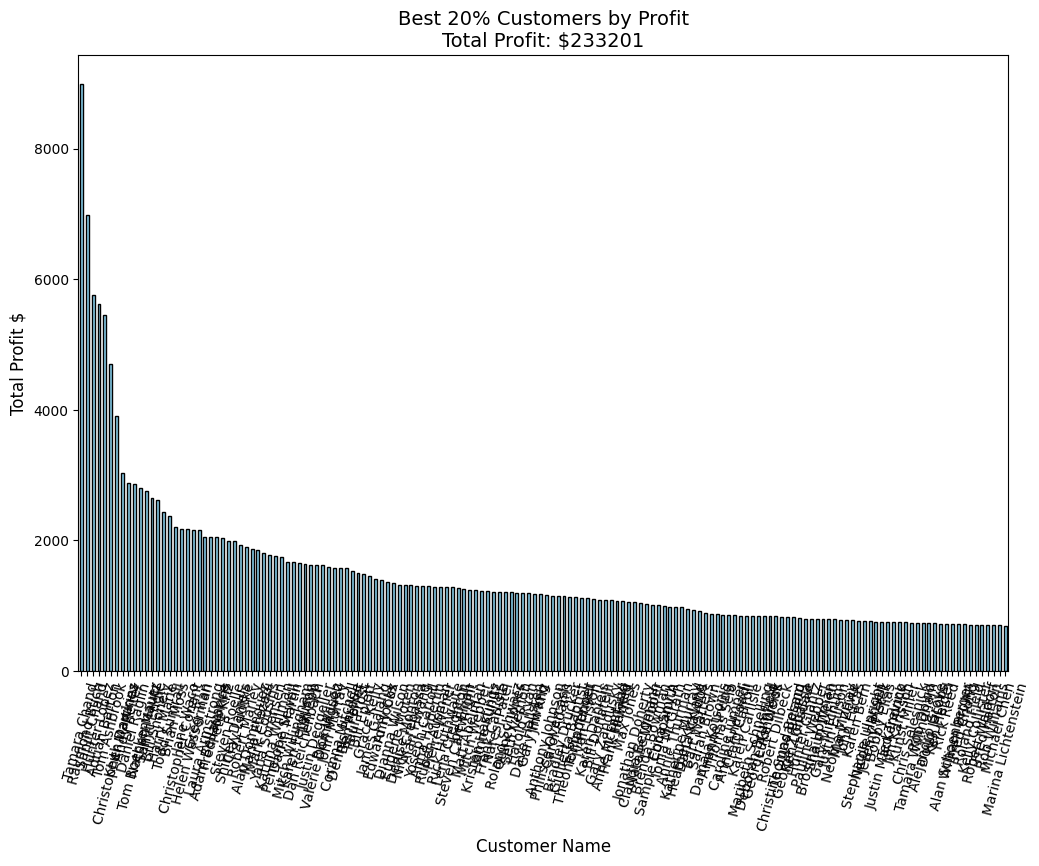

In [69]:
best_customer = superstore_clean.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
best_20_percent = int(0.2*len(best_customer))
top_20_percent_customers = best_customer.head(best_20_percent).index
# calculating 20% of best customers by profit in new value
best_profit = superstore_clean[superstore_clean['Customer Name'].isin(top_20_percent_customers)].groupby('Customer Name')['Profit'].sum()
best_profit_sorted = best_profit.sort_values(ascending=False)
total_profit_top_20_percent = int(best_profit_sorted.sum()) # converting float into integer for readability

plt.figure(figsize=(12,8))
best_profit_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Best 20% Customers by Profit\nTotal Profit: ${total_profit_top_20_percent}', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Profit $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.show()

in general, clients generate a surplus relatively equally, with the exception of a few clients who are most likely outliers

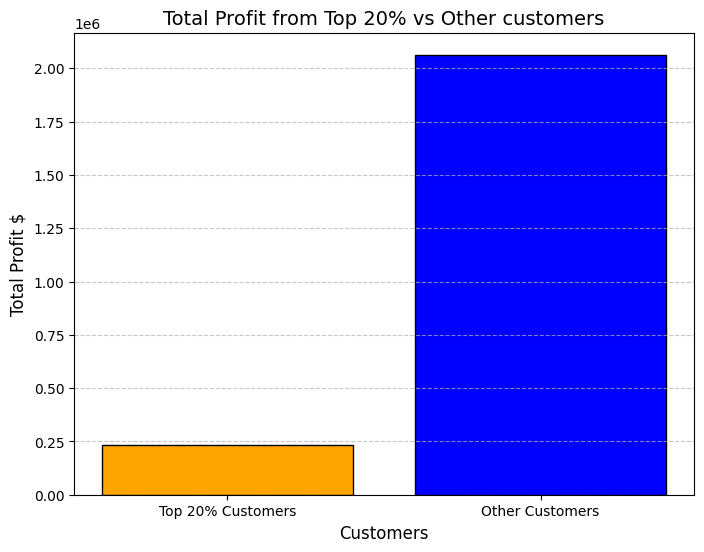

In [92]:
total_ptofit_from_all_customers = int(superstore_clean['Sales'].sum())

plt.figure(figsize=(8,6))
profits = [total_profit_top_20_percent, total_ptofit_from_all_customers - total_profit_top_20_percent]
labels = ['Top 20% Customers', 'Other Customers']
plt.bar(labels,profits,color=['orange','blue'], edgecolor='black')
plt.title(f'Total Profit from Top 20% vs Other customers', fontsize=14)
plt.xlabel('Customers', fontsize=12)
plt.ylabel('Total Profit $', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

however, as we see here, it is these outliers that generate the greatest profit from all clients, more than 80%. This means you need to focus your attention on these 20% of clients so that revenue does not fall. as we know, the greatest profit comes from clients from New York and California, therefore, it is also not worth depriving these two states of marketing attention

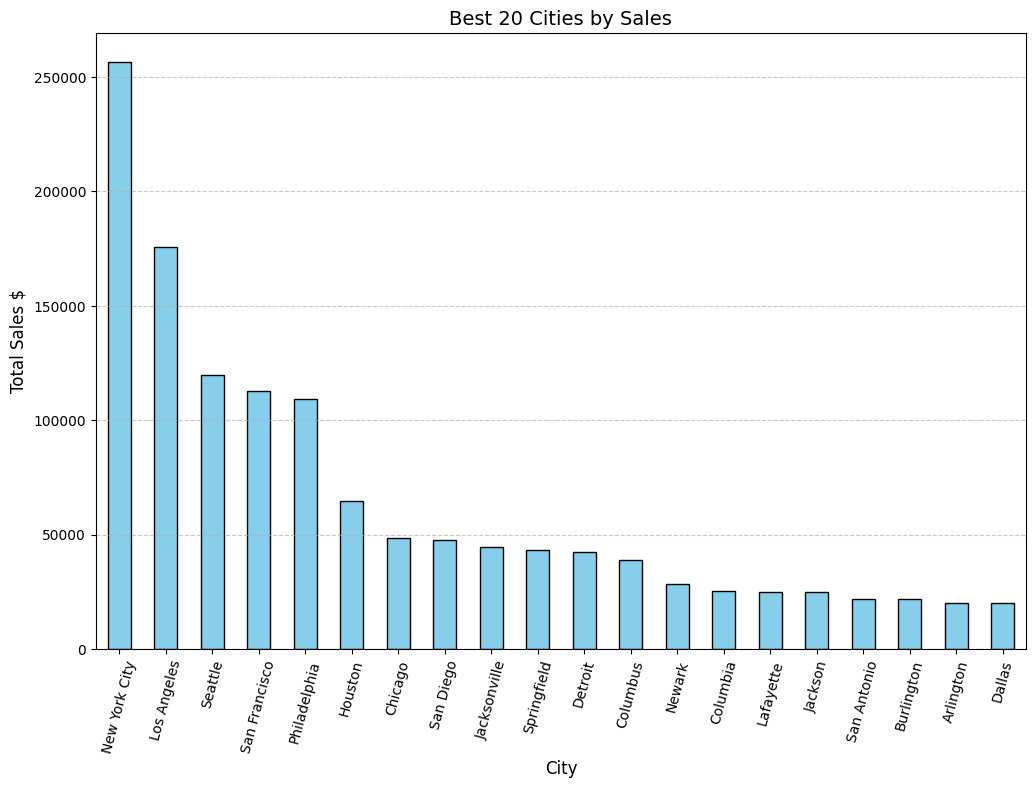

In [81]:
best_city = superstore_clean.groupby('City')['Sales'].sum().sort_values(ascending=False)
best_20_city = best_city.head(20)

plt.figure(figsize=(12,8))
best_20_city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Best 20 Cities by Sales', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Among the cities, New York is also a clear favorite. since this is the top of all cities, we see that the top 5 cities form the bulk of all sales among all cities

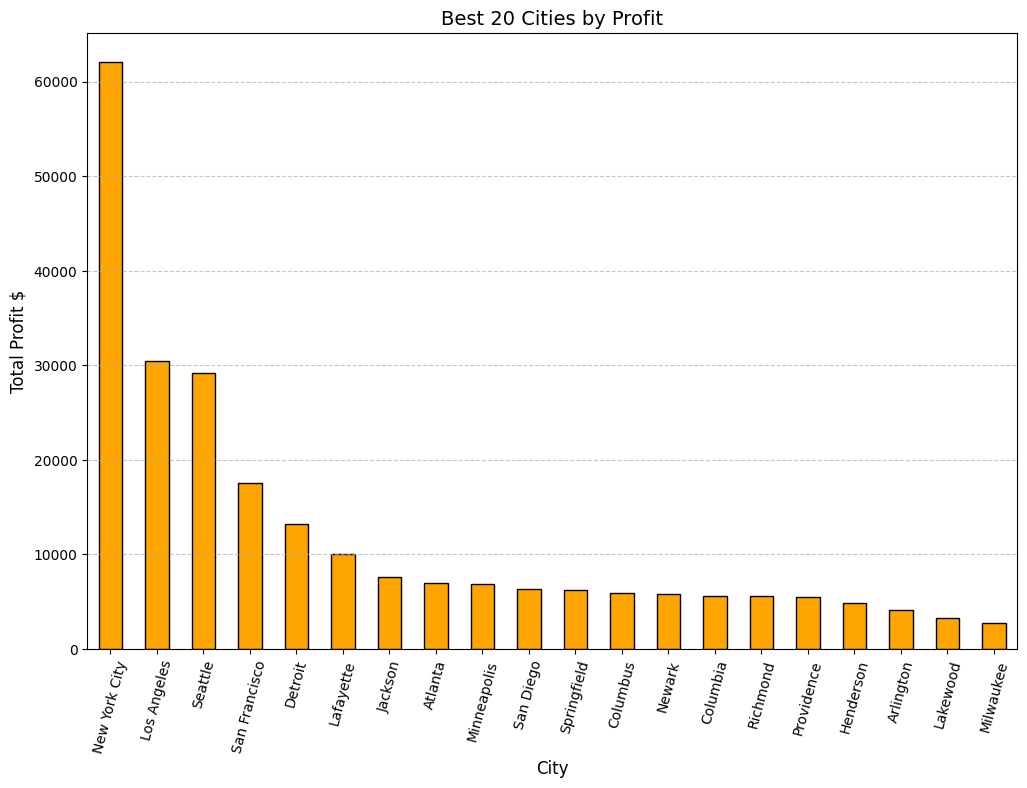

In [109]:
best_city_profit = superstore_clean.groupby('City')['Profit'].sum().sort_values(ascending=False)
best_20_city_profit = best_city_profit.head(20)

plt.figure(figsize=(12,8))
best_20_city_profit.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Best 20 Cities by Profit', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Profit $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can single out New York, Los Angeles and Seattle as the cities with the largest number of sales and at the same time the largest profit. You need to pay attention to cities that are not included in either the list of the best in sales or the list of the best in profit

<Figure size 1200x800 with 0 Axes>

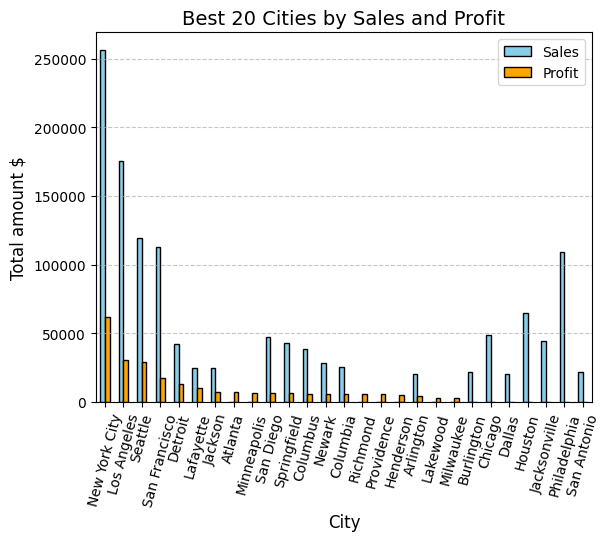

In [83]:
best_city = superstore_clean.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
best_city_profit = superstore_clean.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)
# calculating total sales and profit and filtering by city
# comparing in 1 plot for better viasualization
combined_data = pd.DataFrame({
    'Sales': best_city,
    'Profit': best_city_profit
}).sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12,8))
combined_data.plot(kind='bar', color=['skyblue','orange'], edgecolor='black')
plt.title('Best 20 Cities by Sales and Profit', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total amount $', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.legend(['Sales','Profit'],fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

When comparing, we see cities on the right side of the graph that give a large number of sales, but do not generate profit at all, we need to pay attention to the work of the sales department in these cities. in cities that generate profits, but fall short in the total number of sales, you need to focus on marketing and develop a sales network, since there are solvent buyers there

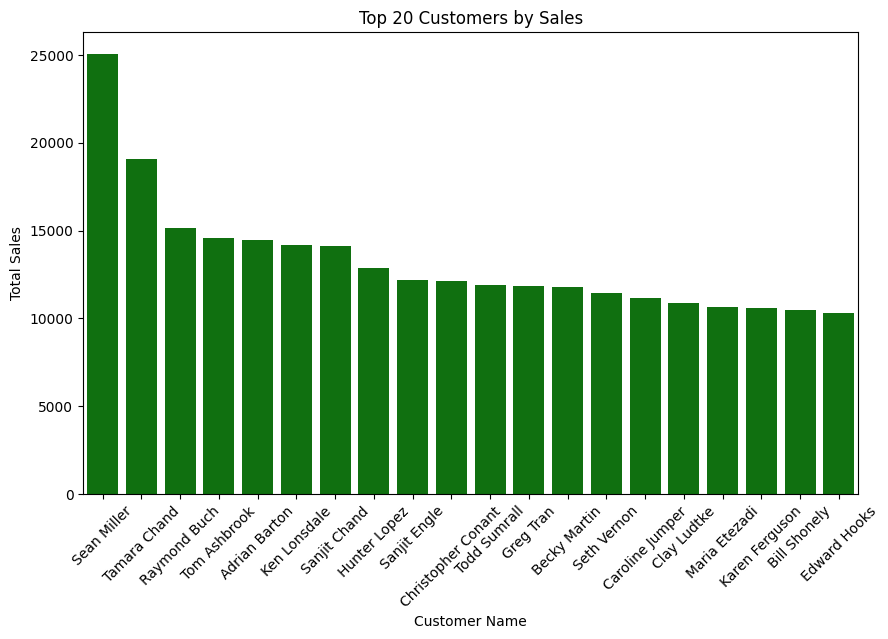

In [87]:
import seaborn as sns
best_20_customers = superstore_clean.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=best_20_customers.index, y=best_20_customers.values, color='green')
plt.title('Top 20 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

the top best buyers generate the greatest revenue and profit. as we can see from the formula below, 20% of all customers generate 80% of all sales. We need to strengthen our work with these clients and not lose them

In [97]:
# checking if 20% customers generated 80% of total
all_customers_sales = superstore_clean['Sales'].sum()
customer_sales = superstore_clean.groupby('Customer Name')['Sales'].sum()
best_20_percent_sales = int(0.2*len(customer_sales))
top20_percent_customers = customer_sales.head(best_20_percent_sales).index

best_sales = superstore_clean[superstore_clean['Customer Name'].isin(top20_percent_customers)].groupby('Customer Name')['Sales'].sum()
total_sales_top_20_percent = int(best_sales.sum())
print(f"Percentage of Total Sales from 20% customers: {total_sales_top_20_percent / all_customers_sales * 100:.2f}%")

Percentage of Total Sales from 20% customers: 18.45%


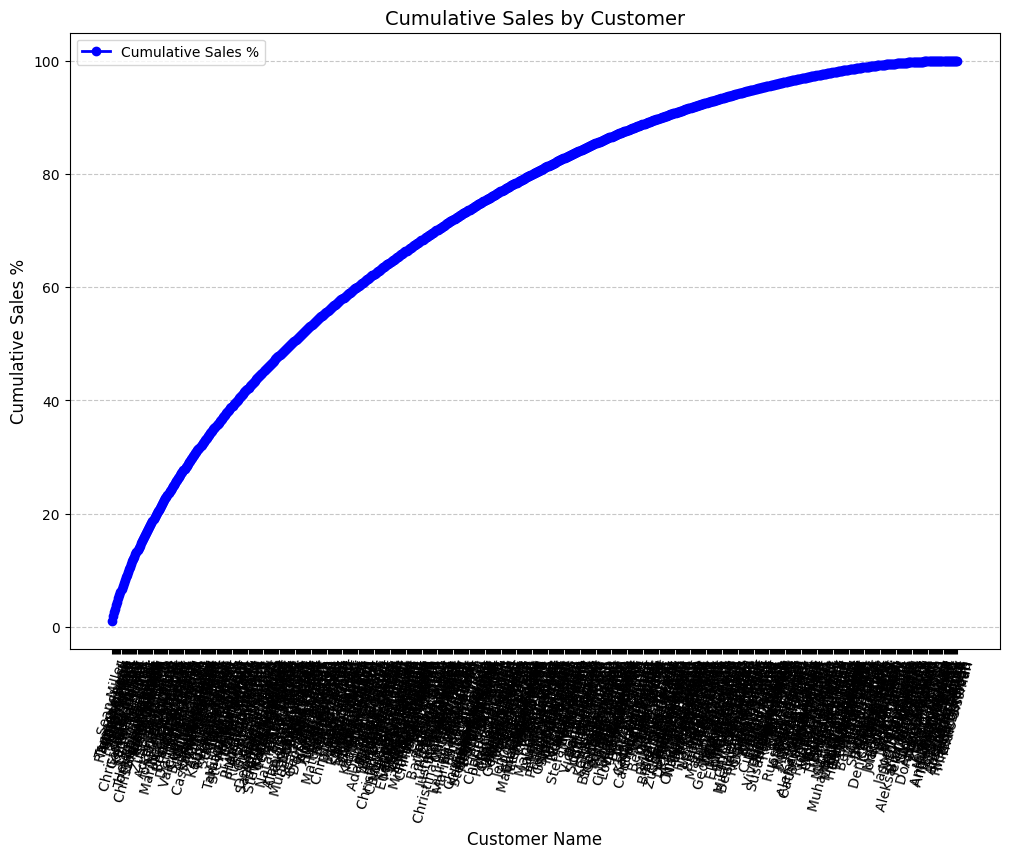

In [88]:
all_customers_sales = superstore_clean.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
cumulative_sales = all_customers_sales.cumsum()
cumulative_sales_percentage = cumulative_sales / all_customers_sales.sum() * 100

plt.figure(figsize=(12,8))
plt.plot(cumulative_sales.index, cumulative_sales_percentage, color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Cumulative Sales by Customer', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Cumulative Sales %', fontsize=12)
plt.xticks(rotation=75, fontsize=10)
plt.legend(['Cumulative Sales %'],fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The steep portion of the curve (at the start) indicates that a few customers contribute significantly to total sales, and the flat portion at the end shows us customers with lower sales contributions.

In [99]:
superstore_clean.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


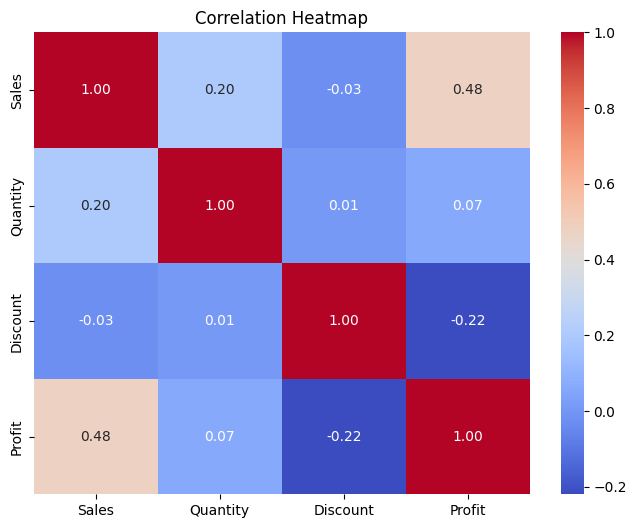

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
# variable for all numerical columns
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
correlation_matrix = superstore_clean[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


we can see a correlation between profit and discount

In [101]:
superstore_clean['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

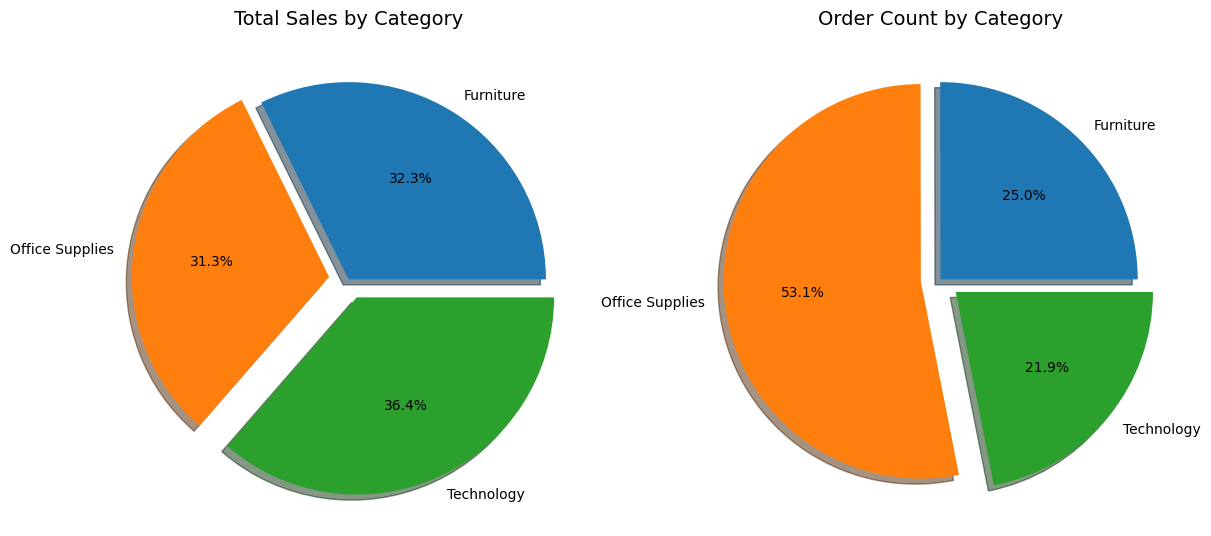

In [107]:
import matplotlib.pyplot as plt
sales_by_category = superstore_clean.groupby('Category')['Sales'].sum()
order_count_by_category = superstore_clean.groupby('Category')['Order ID'].nunique()
explode = (0, 0.1, 0.1) # creating explode for better visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', explode=explode, shadow=True)
ax[0].set_title('Total Sales by Category', fontsize=14)

ax[1].pie(order_count_by_category, labels=order_count_by_category.index, autopct='%1.1f%%', explode=explode, shadow=True)
ax[1].set_title('Order Count by Category', fontsize=14)

plt.show()

here you can see that customers order office supplies most often and equipment least of all, but in the second graph we see that all categories generate sales equally. We can conclude that equipment brings the greatest profit and benefit to the company and marketing needs to focus on selling this particular category of goods

In [ ]:
# Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

Based on the graphs reviewed, we need to focus on products in the “technology” category. Make a decision on working with deficit states and cities, pay attention to the fact that some states, cities and clients form 80% of the company’s total revenue and profit and the loss of at least one client, or a decline in sales in at least one of these cities or states may critically affect the company's revenue. We need to strengthen work with key clients and strengthen marketing in lagging cities and states, organize the work of sales departments there so that there is not such a clear advantage in sales and profit and the curve becomes smoother.